In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 解題步驟：

1. 將 train.csv, test.csv 合併
2. 取出 LotFrontage, GarageYrBlt, MasVnrArea 三個特徵的資料
3. 分別以平均值及中位數來填補缺失值
4. 分析缺失值，練習繪製直方圖及機率圖 (如下圖)
5. 分別計算原本、以平均值填補、以中位數填補的標準差
6. 課後問答

<img src="./data/hist_plot.png" style="zoom:100%;" />

## Hint

* [pandas.DataFrame.fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
* [seaborn.histplot](


## 讀取資料

In [3]:
""" Your code hear: 讀取 train.csv, test.csv 並合併 """
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
concat_df = pd.concat([train,test],axis=0)
concat_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1431,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,192140
1,757,60,RL,68.0,10769,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,212000
2,632,120,RL,34.0,4590,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,209500
3,1193,50,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,125000
4,773,80,RL,94.0,7819,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Abnorml,107000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1327,30,RH,70.0,4270,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,79000
361,1154,30,RM,NaN,5890,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,120500
362,665,20,RL,49.0,20896,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2006,New,Partial,423000
363,1259,80,RL,59.0,9587,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,190000


column: PoolQC type: object NaN Rate: 99.52%
column: MiscFeature type: object NaN Rate: 96.3%
column: Alley type: object NaN Rate: 93.77%
column: Fence type: object NaN Rate: 80.75%
column: FireplaceQu type: object NaN Rate: 47.26%
column: LotFrontage type: number NaN Rate: 17.74%
column: GarageYrBlt type: number NaN Rate: 5.55%
column: GarageType type: object NaN Rate: 5.55%
column: GarageFinish type: object NaN Rate: 5.55%
column: GarageQual type: object NaN Rate: 5.55%
column: GarageCond type: object NaN Rate: 5.55%
column: BsmtFinType2 type: object NaN Rate: 2.6%
column: BsmtExposure type: object NaN Rate: 2.6%
column: BsmtFinType1 type: object NaN Rate: 2.53%
column: BsmtCond type: object NaN Rate: 2.53%
column: BsmtQual type: object NaN Rate: 2.53%
column: MasVnrArea type: number NaN Rate: 0.55%
column: MasVnrType type: object NaN Rate: 0.55%
column: Electrical type: object NaN Rate: 0.07%


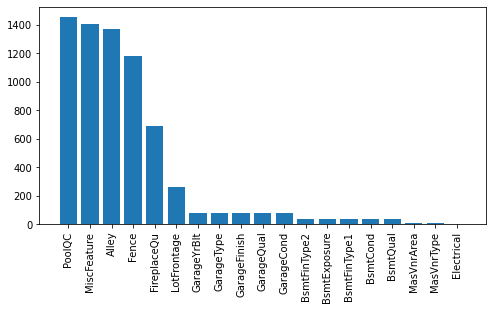

In [15]:
missing = concat_df.isnull().sum(axis = 0)
missing = missing[missing > 0]
missing.sort_values(inplace=True, ascending = False)

discrete = concat_df.columns[concat_df.dtypes == 'object']


for c, t in zip(missing.index, missing.values):
    if c in discrete:
        print(f'column: {c} type: object NaN Rate: {round(t / concat_df.shape[0]*100,2)}%')
    else:
        print(f'column: {c} type: number NaN Rate: {round(t / concat_df.shape[0]*100,2)}%')

plt.figure(figsize = (8, 4))
plt.bar(list(missing.index), np.array(missing))
plt.xticks(rotation='vertical')
plt.show()

## 分離目標

column: LotFrontage type: number NaN Rate: 17.74%
column: GarageYrBlt type: number NaN Rate: 5.55%
column: MasVnrArea type: number NaN Rate: 0.55%


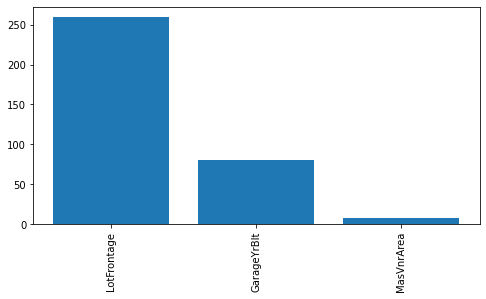

In [16]:
# 將目標分析欄位取出來
""" Your code hear: """
target_feature = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
na_cnt = concat_df[target_feature].isnull().sum(axis = 0)

for c, t in zip(na_cnt.index, na_cnt.values):
    if c in discrete:
        print(f'column: {c} type: object NaN Rate: {round(t / concat_df.shape[0]*100,2)}%')
    else:
        print(f'column: {c} type: number NaN Rate: {round(t / concat_df.shape[0]*100,2)}%')


plt.figure(figsize = (8, 4))
plt.bar(list(na_cnt.index), np.array(na_cnt))
plt.xticks(rotation='vertical')
plt.show()


## 繪圖

       LotFrontage
count  1201.000000
mean     70.049958
std      24.284752
min      21.000000
25%      59.000000
50%      69.000000
75%      80.000000
max     313.000000


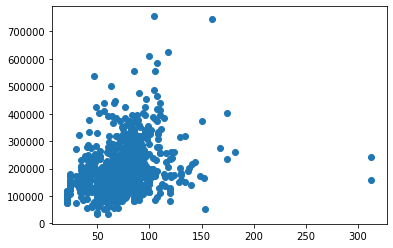

C:\Users\johnma\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


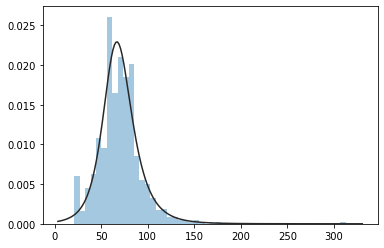

In [25]:
# LotFrontage 繪圖
""" Your code hear: """
from scipy import stats

print(concat_df[['LotFrontage']].describe())

plt.scatter(concat_df[['LotFrontage']], concat_df[['SalePrice']])
plt.show()

# 可以發現預測目標並不符合常態分佈
y = concat_df[['LotFrontage']]
JS = stats.johnsonsu.fit

sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.show()



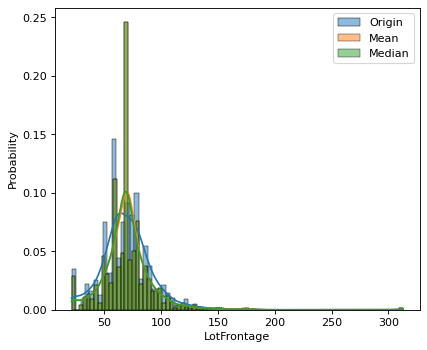

In [129]:

mean_df = concat_df['LotFrontage'].fillna(concat_df['LotFrontage'].mean())  
median_df = concat_df['LotFrontage'].fillna(concat_df['LotFrontage'].median())

label = ['Origin', 'Mean', 'Median']
color = ['tab:blue', 'tab:orange', 'tab:green']
datas = [concat_df['LotFrontage'], mean_df, median_df]
plt.figure(figsize = (20, 5), dpi = 80)
plt.subplot(1, 3, 1)
for i in range(3):
    sns.histplot(datas[i], kde = True, stat = 'probability', element = 'bars', label = label[i], color = color[i])
plt.legend()



In [119]:
pd.cut(concat_df['LotFrontage'], bins=10, labels=False, retbins=True, right=False)[1][2:10]


array([ 79.4, 108.6, 137.8, 167. , 196.2, 225.4, 254.6, 283.8])

       LotFrontage
count  1201.000000
mean     70.049958
std      24.284752
min      21.000000
25%      59.000000
50%      69.000000
75%      80.000000
max     313.000000


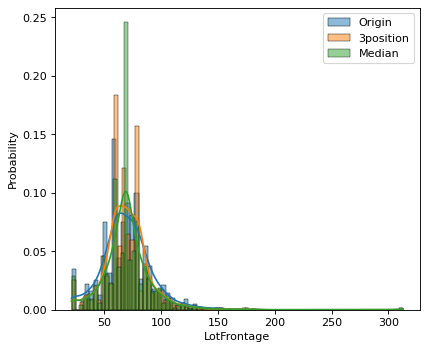

In [132]:
test_df = concat_df.copy()

position_25 = concat_df[['LotFrontage']].describe().loc['25%'].values[0]
position_75 = concat_df[['LotFrontage']].describe().loc['75%'].values[0]
position_50 = concat_df[['LotFrontage']].describe().loc['50%'].values[0]
print(concat_df[['LotFrontage']].describe())


n = 0
for i in concat_df[concat_df['LotFrontage'].isnull()].index.tolist():
    if n % 3 == 1:
        test_df.loc[i,'LotFrontage'] = position_25
    elif n % 3 == 2:
        test_df.loc[i,'LotFrontage'] = position_50
    else:
        test_df.loc[i,'LotFrontage'] = position_75
    n += 1



test_df2 = concat_df.copy()


bin = pd.cut(concat_df['LotFrontage'], bins=10, labels=False, retbins=True, right=False)[1][2:10]
bin_len = len(bin)

n = 0
for i in concat_df[concat_df['LotFrontage'].isnull()].index.tolist():
    test_df2.loc[i,'LotFrontage'] = bin[n % bin_len]
    n += 1




# n = 0
# l = []
# for i in concat_df[concat_df['LotFrontage'].isnull()].index.tolist():
#     l.append(test_df.iloc[i]['LotFrontage'])
#     n += 1
# print(n, l)


label = ['Origin', '3position', 'Median']
color = ['tab:blue', 'tab:orange', 'tab:green']
datas = [concat_df['LotFrontage'], test_df['LotFrontage'], median_df]

plt.figure(figsize = (20, 5), dpi = 80)
plt.subplot(1, 3, 1)
for i in range(3):
    sns.histplot(datas[i], kde = True, stat = 'probability', element = 'bars', label = label[i], color = color[i])
plt.legend()


LotFrontage = [concat_df['LotFrontage'], test_df['LotFrontage'], median_df]

LotFrontage2 = [concat_df['LotFrontage'], mean_df, median_df]


       GarageYrBlt
count  1379.000000
mean   1978.506164
std      24.689725
min    1900.000000
25%    1961.000000
50%    1980.000000
75%    2002.000000
max    2010.000000


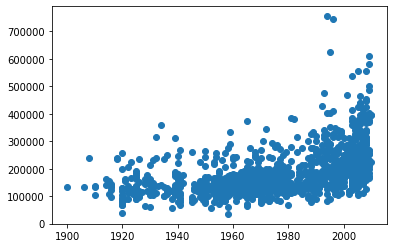

C:\Users\johnma\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


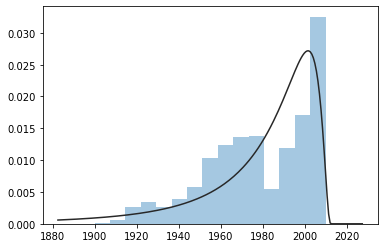

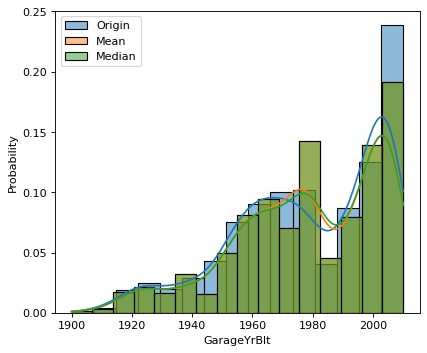

In [121]:
# GarageYrBlt 繪圖
""" Your code hear: """
from scipy import stats

print(concat_df[['GarageYrBlt']].describe())

plt.scatter(concat_df[['GarageYrBlt']], concat_df[['SalePrice']])
plt.show()

# 可以發現預測目標並不符合常態分佈
y = concat_df[['GarageYrBlt']]
JS = stats.johnsonsu.fit

sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.show()


mean_df = concat_df['GarageYrBlt'].fillna(concat_df['GarageYrBlt'].mean())  
median_df = concat_df['GarageYrBlt'].fillna(concat_df['GarageYrBlt'].median())

label = ['Origin', 'Mean', 'Median']
color = ['tab:blue', 'tab:orange', 'tab:green']
datas = [concat_df['GarageYrBlt'], mean_df, median_df]
plt.figure(figsize = (20, 5), dpi = 80)
plt.subplot(1, 3, 1)
for i in range(3):
    sns.histplot(datas[i], kde = True, stat = 'probability', element = 'bars', label = label[i], color = color[i])
plt.legend()

GarageYrBlt = [concat_df['GarageYrBlt'], mean_df, median_df]


        MasVnrArea
count  1452.000000
mean    103.685262
std     181.066207
min       0.000000
25%       0.000000
50%       0.000000
75%     166.000000
max    1600.000000


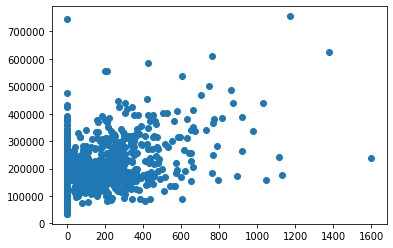

C:\Users\johnma\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\johnma\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_continuous_distns.py:4026: RuntimeWarning: divide by zero encountered in log
  trm = _norm_pdf(a + b * np.log(x + np.sqrt(x2+1)))


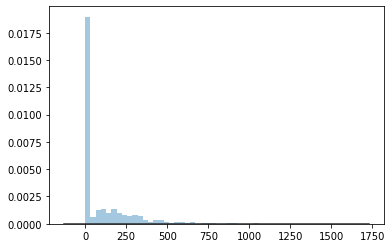

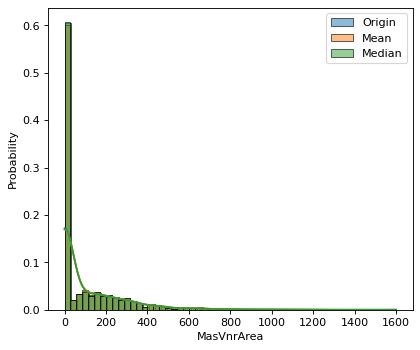

In [122]:
# MasVnrArea 繪圖
""" Your code hear: """
from scipy import stats

print(concat_df[['MasVnrArea']].describe())

plt.scatter(concat_df[['MasVnrArea']], concat_df[['SalePrice']])
plt.show()

# 可以發現預測目標並不符合常態分佈
y = concat_df[['MasVnrArea']]
JS = stats.johnsonsu.fit

sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.show()


mean_df = concat_df['MasVnrArea'].fillna(concat_df['MasVnrArea'].mean())  
median_df = concat_df['MasVnrArea'].fillna(concat_df['MasVnrArea'].median())

label = ['Origin', 'Mean', 'Median']
color = ['tab:blue', 'tab:orange', 'tab:green']
datas = [concat_df['MasVnrArea'], mean_df, median_df]
plt.figure(figsize = (20, 5), dpi = 80)
plt.subplot(1, 3, 1)
for i in range(3):
    sns.histplot(datas[i], kde = True, stat = 'probability', element = 'bars', label = label[i], color = color[i])
plt.legend()


MasVnrArea = [concat_df['MasVnrArea'], mean_df, median_df]


## 分析標準差

In [131]:
""" Your code hear: """
type = ['Org', 'meam', 'med']

for i in range(3):
    print(f'{type[i]} LotFrontage: {LotFrontage[i].std()} seft: {LotFrontage2[i].std()} GarageYrBlt: {GarageYrBlt[i].std()}  MasVnrArea: {MasVnrArea[i].std()}')




Org LotFrontage: 24.284751774483208 seft: 24.284751774483208 GarageYrBlt: 24.689724768590242  MasVnrArea: 181.0662065872166
meam LotFrontage: 20.78053931943454 seft: 22.024022688706957 GarageYrBlt: 23.994583259057606  MasVnrArea: 180.56911242597204
med LotFrontage: 22.027677088952416 seft: 22.027677088952416 GarageYrBlt: 23.997021528934233  MasVnrArea: 180.7313733581237


## 透過分析標準差可以得到什麼結果？

In [ ]:
可以知道資料的集中度